In [105]:
import seaborn as sns
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# np.random.seed(2)


G=data.Random2DGaussian()
X=G.get_sample(100)
# plt.scatter(X[:,0], X[:,1])
# plt.show()

X, Y = data.sample_gauss_2d(2, 4)

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit_transform(X, Y)

/usr/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 7.61853249],
       [ 7.20622692],
       [ 7.61364863],
       [ 7.01199133],
       [ 1.37374628],
       [ 0.99043726],
       [ 0.63725745],
       [ 1.50329315]])

/usr/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


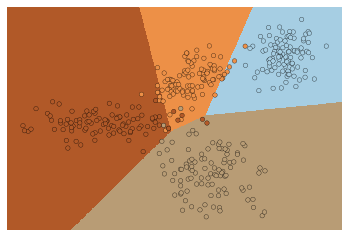

In [76]:

# import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# Y = iris.target

X, Y = data.sample_gauss_2d(4, 100)

h = .01  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1)
# logreg = linear_model.LogisticRegression(C=1e5, multi_class='multinomial', solver='lbfgs')


# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)
Yp = logreg.predict(X).reshape([-1, 1])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


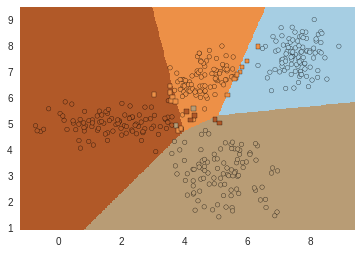

In [86]:
data.graph_data_pred(X, Y, logreg)
plt.show()

# 5.3

In [97]:
%aimport tf_deep

X, Y = data.sample_gmm_2d(4, 2, 40)
oh = OneHotEncoder(sparse=False)
oh.fit(Y)
Yoh = oh.transform(Y)

             precision    recall  f1-score   support

          0       1.00      0.95      0.97        40
          1       0.98      1.00      0.99       120

avg / total       0.99      0.99      0.99       160

confusion matrix
 [[ 38   2]
 [  0 120]]


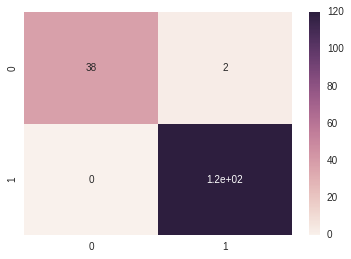